# Evoimage Analysis

This is mainly some work for simple figures for a presentation and report about this work

In [11]:
# Import we use across the notebook

import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

# We have noticed that setting a new style doesn't clear ALL settings,
# so this order is important:
plt.style.use('classic')               # set to defaults
plt.style.use('ggplot')                # ggplot is decent
plt.style.use('seaborn')               # but we prefer seaborn
plt.style.use('seaborn-colorblind')    # accessibility is important
sea.set_style('white')

from IPython.display import display

%matplotlib inline

## Initial Triangle Size

We choose our vertices at random from within the image square when we initialize our
population. What does the distribution of triangle area look like?

We will assume a square image at 128x128 pixels for simplicity sake.

We use the **Shoelace Formula** (see https://math.stackexchange.com/a/516223). It is:

$Area = \frac12 \big| (x_A - x_C) (y_B - y_A) - (x_A - x_B) (y_C - y_A) \big|$

In [12]:
#Shoelace formula
def tri_area(va, vb, vc):
    xa, ya = va
    xb, yb = vb
    xc, yc = vc
    return 0.5 * sp.absolute(((xa - xc) * (yb - ya)) - ((xa - xb) * (yc - ya)))

count    500000.000000
mean          0.076428
std           0.067719
min           0.000000
25%           0.024017
50%           0.057159
75%           0.110474
max           0.464294
dtype: float64

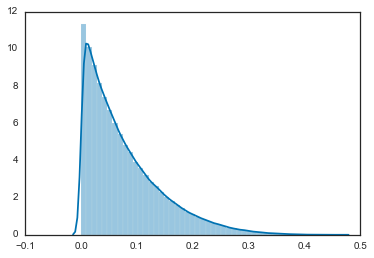

In [14]:
def rand_triangle(dim):
    xa, ya, xb, yb, xc, yc = [int(i*dim) for i in sp.rand(6)]
    return (xa, ya), (xb, yb), (xc, yc)

# Get the areas for 500,000 triangles in 128x128 image
areas = sp.array([tri_area(*rand_triangle(128)) for _ in range(500000)])
# Scale by area of image
areas /= (128*128)

# Display/describe
areas = pd.Series(areas)
display(areas.describe())
sea.distplot(areas)